#Problema de clasificación de imágenes Cifar10 usando una CNN

##Integrantes

Gabriel Jeannot, 2185887

Isabella Herrarte, 2190083

##Importación de librerías

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
from keras.utils.np_utils import to_categorical   
import matplotlib.pyplot as plt
import cv2 as cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from keras.utils import np_utils

##Descarga del dataset Cifar10

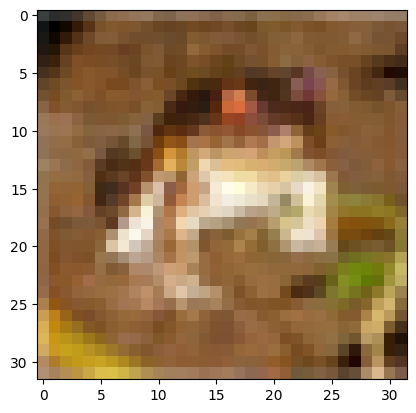

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
plt.imshow(x_train[0])

##Normalización de datos

In [3]:
x_train = x_train / 255
x_test = x_test / 255
print('x_train shape:', x_train.shape, '\nx_test shape:', x_test.shape, '\ny_train shape:', y_train.shape, '\ny_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3) 
x_test shape: (10000, 32, 32, 3) 
y_train shape: (50000, 1) 
y_test shape: (10000, 1)


##One hot encoding (Vector one)

In [4]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

print('y_train shape:', y_train.shape, '\ny_test shape:', y_test.shape)

y_train shape: (50000, 10) 
y_test shape: (10000, 10)


In [5]:
input_shape = x_train.shape[1:]
num_classes = y_train.shape[1]

print('input shape:', input_shape, '\nnum classes:', num_classes)

input shape: (32, 32, 3) 
num classes: 10


##Arquitectura del modelo

In [6]:
def model():# 32x32
  model = Sequential()
  model.add(Conv2D(32,(5,5), input_shape=input_shape, activation='relu'))#28x28
  model.add(Conv2D(32,(3,3), activation='relu'))#26x26
  model.add(MaxPooling2D(pool_size=(2,2)))#13x13

  model.add(Conv2D(32,(3,3), activation='relu'))#11x11
  model.add(MaxPooling2D(pool_size=(2,2)))#5x5

  model.add(Dropout(0.3))
  model.add(Flatten())

  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(num_classes, activation='softmax'))

  model.summary()

  opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

  model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

  return model

In [7]:
model = model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0

##Entrenamiento del modelo

In [8]:
history = model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs = 35, batch_size=32, shuffle=True)

Epoch 1/35
1563/1563 [==============================] - 21s 11ms/step - loss: 1.7773 - accuracy: 0.3431 - val_loss: 1.4914 - val_accuracy: 0.4515
Epoch 2/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4350 - accuracy: 0.4789 - val_loss: 1.3097 - val_accuracy: 0.5210
Epoch 3/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3115 - accuracy: 0.5293 - val_loss: 1.2796 - val_accuracy: 0.5450
Epoch 4/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2091 - accuracy: 0.5688 - val_loss: 1.1268 - val_accuracy: 0.5954
Epoch 5/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1273 - accuracy: 0.5999 - val_loss: 1.0362 - val_accuracy: 0.6332
Epoch 6/35
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0641 - accuracy: 0.6222 - val_loss: 1.0317 - val_accuracy: 0.6389
Epoch 7/35
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0028 - accuracy: 0.6462 - val_loss: 0.9780 - val_accurac

In [9]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score)

[1.0043174028396606, 0.689300000667572]


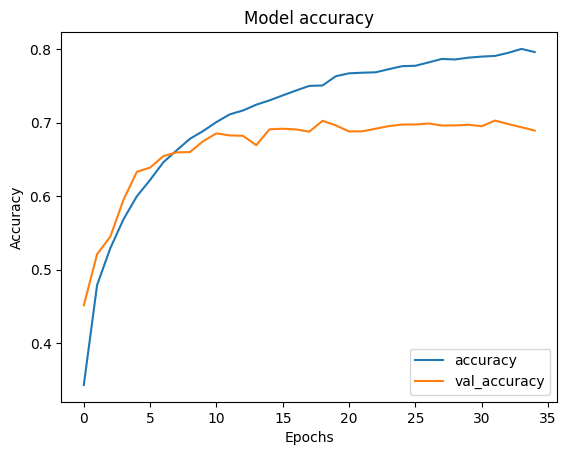

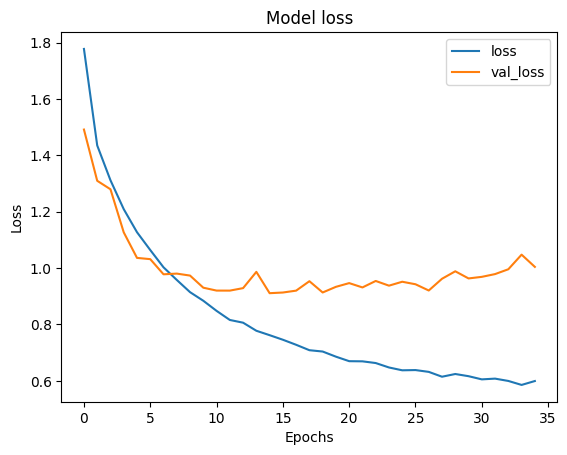

In [10]:
plt.figure()
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.figure()
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'upper right')
plt.show()

##Matriz de confusión

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0.14300609 0.01797792 0.06357309 0.2544258  0.05938499 0.12924628
 0.09689545 0.04749054 0.15904182 0.02895803]


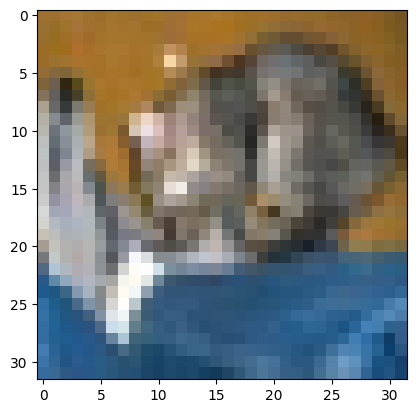

In [11]:
from sklearn.metrics import confusion_matrix

outputTest = model.predict(x_test)
print(outputTest.shape)
print(y_test[0])
print(outputTest[0])
plt.imshow(x_test[0])

In [12]:
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(outputTest, axis=1))
print(cm)

[[794  14  38  17  13   6  12  17  76  13]
 [ 36 845   6  10  12   9  10   7  28  37]
 [107   7 550  93  75  59  60  29  15   5]
 [ 44   7  41 543  75 148  58  53  26   5]
 [ 37   2  78  80 642  43  49  60   8   1]
 [ 25   2  49 227  53 574  21  46   3   0]
 [ 14   3  43  82  52  36 752   8  10   0]
 [ 15   2  26  50  54  67   6 765   8   7]
 [121  25  18  10  11   8   5  10 777  15]
 [ 59 100  17  18   7   9  14  32  93 651]]


In [13]:
def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2','3', '4', '5','6', '7', '8','9']

      plt.figure(figsize = (7,7))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
          cm = np.round(cm,3)
      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

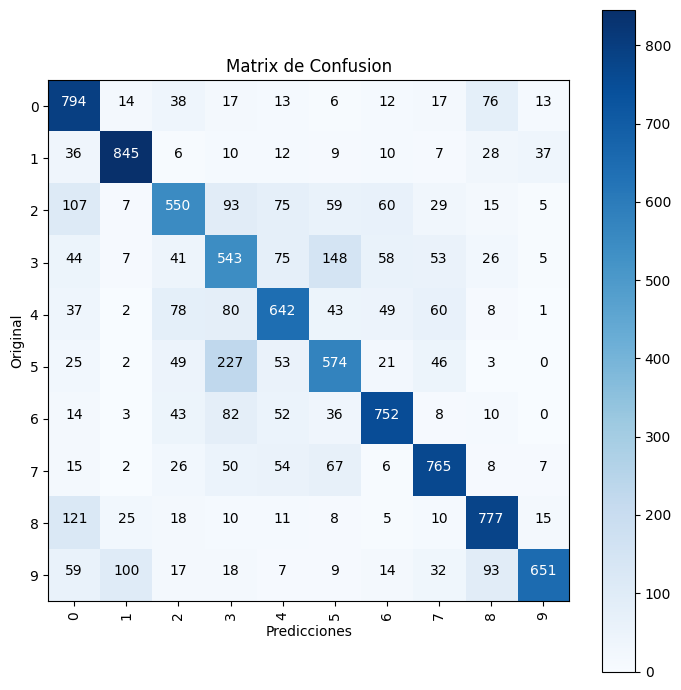

In [14]:
plot_confusion_matrix(cm, num_classes)